In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/netflix_titles.csv")

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()
df.describe(include='all')

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

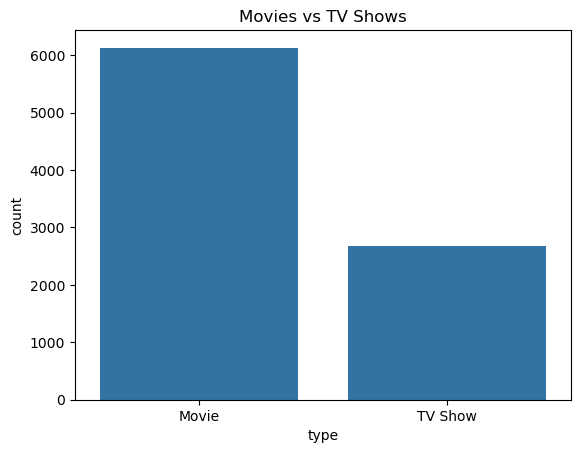

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR')])

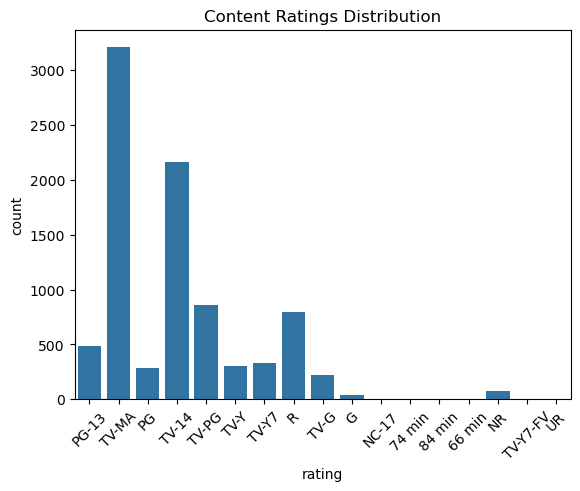

In [5]:
sns.countplot(data=df, x="type")
plt.title("Movies vs TV Shows")
plt.show()
sns.countplot(data=df, x="rating")
plt.title("Content Ratings Distribution")
plt.xticks(rotation=45)

C:\Users\LELIEN\AppData\Local\Temp\ipykernel_10928\4274815947.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.loc[mask, 'date_added_parsed'] = pd.to_datetime(


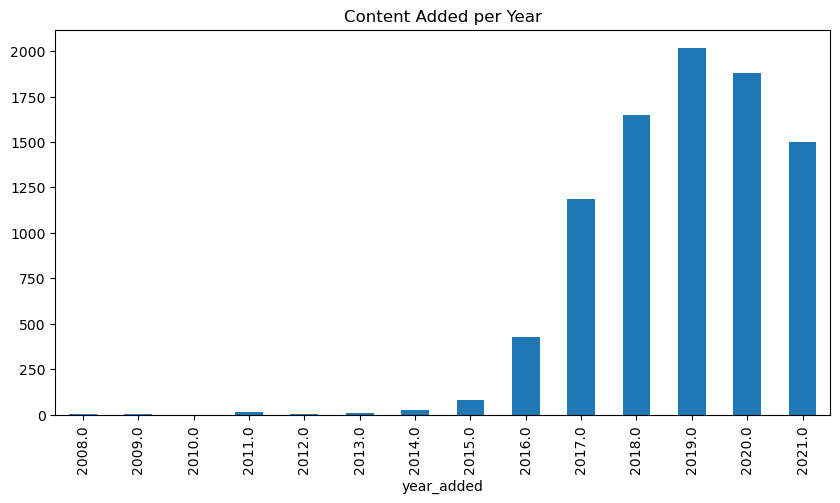

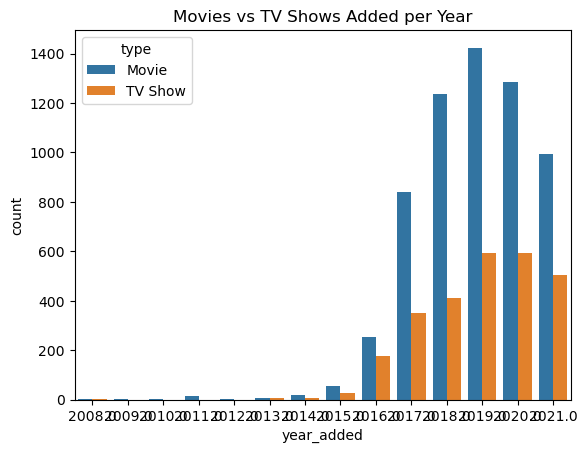

In [7]:

df['date_added_clean'] = df['date_added'].astype(str).str.strip()

# First try the known format, produce NaT on failure instead of raising
df['date_added_parsed'] = pd.to_datetime(
    df['date_added_clean'],
    format='%B %d, %Y',
    errors='coerce'
)


mask = df['date_added_parsed'].isna()
if mask.any():
    df.loc[mask, 'date_added_parsed'] = pd.to_datetime(
        df.loc[mask, 'date_added_clean'],
        errors='coerce',
        infer_datetime_format=True
    )


df['year_added'] = df['date_added_parsed'].dt.year



df["year_added"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5))
plt.title("Content Added per Year")
plt.show()
sns.countplot(data=df, x="year_added", hue="type")
plt.title("Movies vs TV Shows Added per Year")
plt.show()

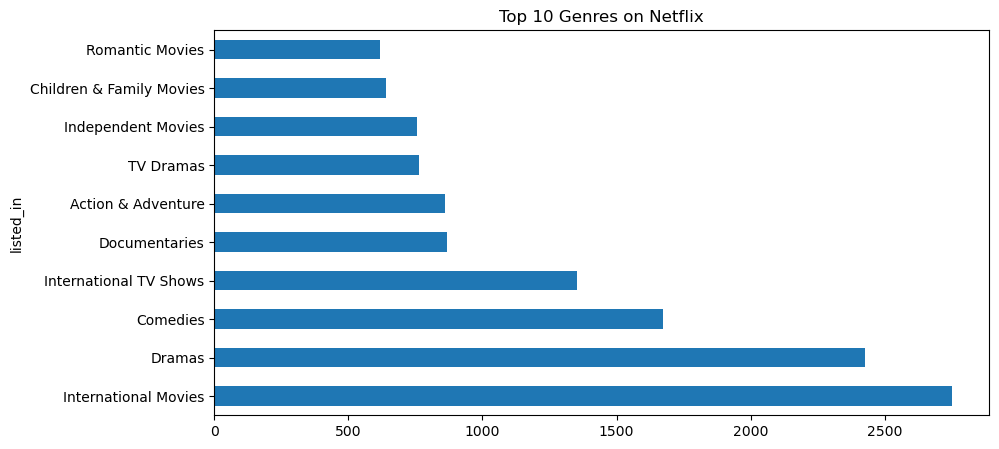

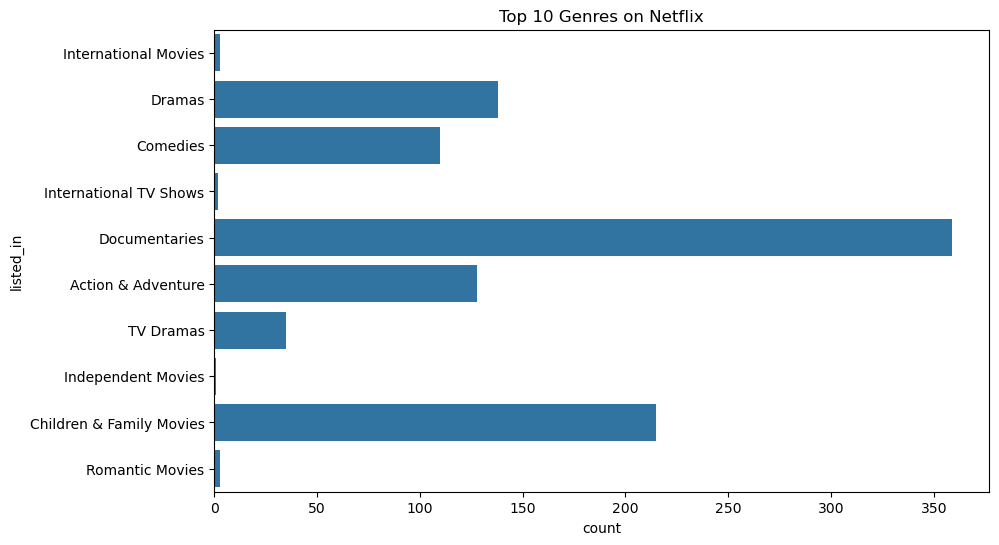

In [9]:
genre_count = df['listed_in'].str.split(', ').explode().value_counts().head(10)

genre_count.plot(kind='barh', figsize=(10, 5))
plt.title("Top 10 Genres on Netflix")
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="listed_in", order=genre_count.index)
plt.title("Top 10 Genres on Netflix")
plt.show()


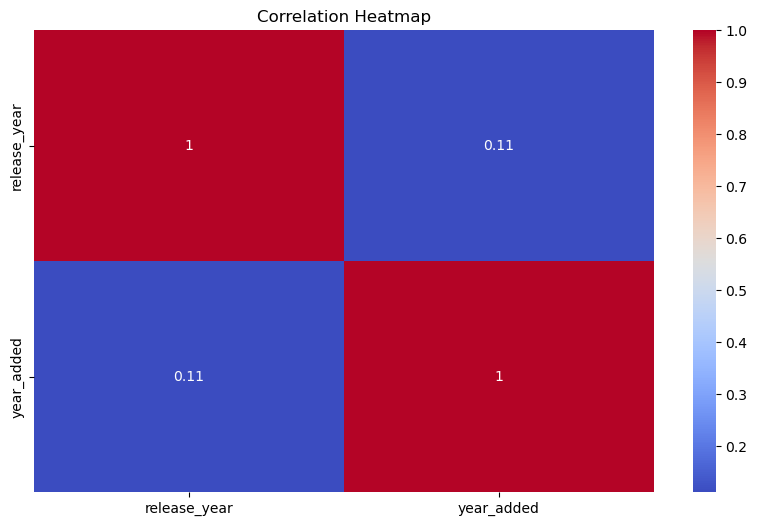

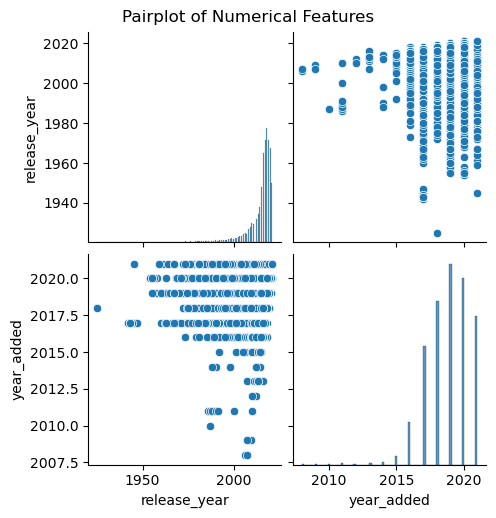

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

In [11]:
import os

def save_plot(name):
    path = f"reports/{name}.png"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    plt.savefig(path, dpi=300, bbox_inches="tight")
    print(f"Saved: {path}")

Saved: reports/movies_vs_shows.png


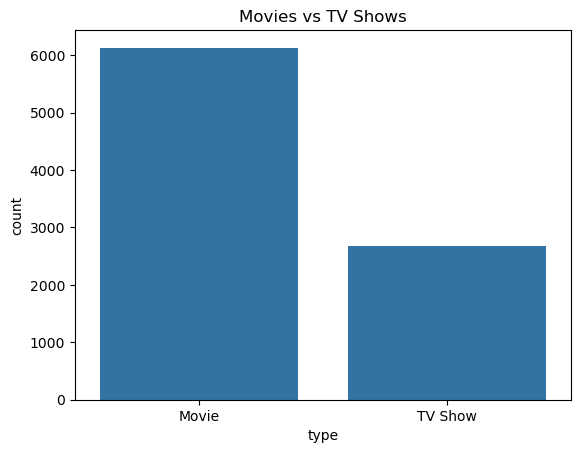

Saved: reports/ratings_distribution.png


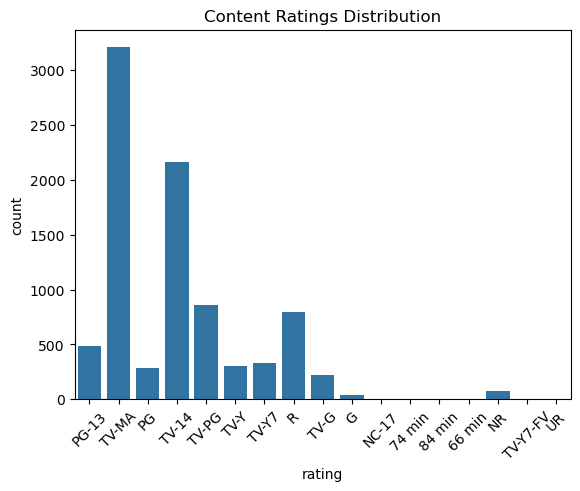

In [12]:
sns.countplot(data=df, x="type")
plt.title("Movies vs TV Shows")
save_plot("movies_vs_shows")
plt.show()
sns.countplot(data=df, x="rating")
plt.title("Content Ratings Distribution")
plt.xticks(rotation=45)
save_plot("ratings_distribution")
plt.show()

df['date_added_clean'] = df['date_added'].astype(str).str.strip()